## Observations
- sentiment cluster around the neutral axis
- for the last 100 tweets, nyt and cnn -  mean of scores closest to neutral
- but when you run it the next day, that changes

In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
users = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']


bbc_list = []
cbs_list = []
cnn_list = []
fox_list = []
nyt_list = []

for status in tweepy.Cursor(api.user_timeline, id='BBCworld').items(100):
    bbc_list.append(status)

for status in tweepy.Cursor(api.user_timeline, id='CBSNews').items(100):
    cbs_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='CNN').items(100):
    cnn_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='FoxNews').items(100):
    fox_list.append(status)
    
for status in tweepy.Cursor(api.user_timeline, id='nytimes').items(100):
    nyt_list.append(status)

In [4]:
bbcdf = pd.DataFrame([x._json for x in bbc_list])[['user', 'text', 'created_at']]

In [6]:
bbcdf['name'] = bbcdf.user.map(lambda x: x.get('name'))

In [23]:
tweets_ago = pd.Series(list(range(1,101)))

In [24]:
bbcdf['tweets_ago'] = tweets_ago.values

In [25]:
bbcdf.tail()

,user,text,created_at,name,tweets_ago
95,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",100 Women: 'Signing a gagging clause set me fr...,Sun Jun 24 01:36:26 +0000 2018,BBC News (World),96
96,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",What impact has Donald Trump had on illegal im...,Sun Jun 24 01:14:34 +0000 2018,BBC News (World),97
97,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Kenya's 'contaminated sugar' row: What we know...,Sun Jun 24 01:12:13 +0000 2018,BBC News (World),98
98,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Europe migrants: Can the EU reach a new deal? ...,Sun Jun 24 01:09:49 +0000 2018,BBC News (World),99
99,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",How many words do you need to speak a language...,Sun Jun 24 01:07:22 +0000 2018,BBC News (World),100


In [26]:
cbsdf = pd.DataFrame([x._json for x in cbs_list])[['user', 'text', 'created_at']]
cbsdf['name'] = cbsdf.user.map(lambda x: x.get('name'))
cbsdf['tweets_ago'] = tweets_ago.values

In [27]:
cbsdf.head()

,user,text,created_at,name,tweets_ago
0,"{'id': 15012486, 'id_str': '15012486', 'name':...",A very good dog on the Chicago Police Departme...,Tue Jun 26 01:20:38 +0000 2018,CBS News,1
1,"{'id': 15012486, 'id_str': '15012486', 'name':...","Not only did he risk his life, trekking 600 mi...",Tue Jun 26 01:00:58 +0000 2018,CBS News,2
2,"{'id': 15012486, 'id_str': '15012486', 'name':...","""It's the party of Maxine Waters. Do you belie...",Tue Jun 26 00:42:39 +0000 2018,CBS News,3
3,"{'id': 15012486, 'id_str': '15012486', 'name':...","""He's lost, he looks like a lost soul"": Presid...",Tue Jun 26 00:36:27 +0000 2018,CBS News,4
4,"{'id': 15012486, 'id_str': '15012486', 'name':...",Child fires shot inside an Indiana Ikea after ...,Tue Jun 26 00:20:02 +0000 2018,CBS News,5


In [28]:
cnndf = pd.DataFrame([x._json for x in cnn_list])[['user', 'text', 'created_at']]
cnndf['name'] = cnndf.user.map(lambda x: x.get('name'))
cnndf['tweets_ago'] = tweets_ago.values

foxdf = pd.DataFrame([x._json for x in fox_list])[['user', 'text', 'created_at']]
foxdf['name'] = foxdf.user.map(lambda x: x.get('name'))
foxdf['tweets_ago'] = tweets_ago.values

nytdf = pd.DataFrame([x._json for x in nyt_list])[['user', 'text', 'created_at']]
nytdf['name'] = nytdf.user.map(lambda x: x.get('name'))
nytdf['tweets_ago'] = tweets_ago.values

In [30]:
combined_df = pd.concat([bbcdf, cbsdf, cnndf, foxdf, nytdf])

In [32]:
combined_df.tail()

,user,text,created_at,name,tweets_ago
95,"{'id': 807095, 'id_str': '807095', 'name': 'Th...","For the second time this month, the authoritie...",Mon Jun 25 07:59:05 +0000 2018,The New York Times,96
96,"{'id': 807095, 'id_str': '807095', 'name': 'Th...","RT @nytimesworld: Kim Jong-pil, who died Satur...",Mon Jun 25 07:46:03 +0000 2018,The New York Times,97
97,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",Turkish voters gave Recep Tayyip Erdogan a dec...,Mon Jun 25 07:30:06 +0000 2018,The New York Times,98
98,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",Elizabeth Warren denounced President Trump's p...,Mon Jun 25 07:21:24 +0000 2018,The New York Times,99
99,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",Ever Felt Jealous of a Friend’s Accomplishment...,Mon Jun 25 07:04:09 +0000 2018,The New York Times,100


In [33]:
from sklearn.utils import shuffle

In [35]:
shuffled = shuffle(combined_df)

In [36]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(some_text):
    return analyzer.polarity_scores(some_text)

In [37]:
shuffled['sent'] = shuffled.text.map(get_sentiment)

shuffled['pos']= shuffled.sent.map(lambda x :x.get('pos'))
shuffled['neg']= shuffled.sent.map(lambda x :x.get('neg'))
shuffled['neu']= shuffled.sent.map(lambda x :x.get('neu'))
shuffled['compound']= shuffled.sent.map(lambda x :x.get('compound'))

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [39]:
shuffled.tail()

,user,text,created_at,name,tweets_ago,sent,pos,neg,neu,compound
8,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Trump to Waters: 'Be careful what you wish for...,Mon Jun 25 20:01:30 +0000 2018,BBC News (World),9,"{'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'comp...",0.323,0.0,0.677,0.5106
15,"{'id': 1367531, 'id_str': '1367531', 'name': '...",".@POTUS on @karringtonsc: ""Katie we're all pul...",Tue Jun 26 00:06:17 +0000 2018,Fox News,16,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.0,0.777,0.5563
52,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",The College Board wants to cut thousands of ye...,Mon Jun 25 17:23:31 +0000 2018,CNN,53,"{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound...",0.000,0.1,0.900,-0.2732
10,"{'id': 1367531, 'id_str': '1367531', 'name': '...",".@POTUS on @FLOTUS: ""She has done a tremendous...",Tue Jun 26 00:33:57 +0000 2018,Fox News,11,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
62,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",Suarez took a free kick from inches outside th...,Mon Jun 25 14:13:34 +0000 2018,The New York Times,63,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",0.263,0.0,0.737,0.8176


In [38]:
shuffled[['pos', 'neg', 'neu']].describe()

,pos,neg,neu
count,500.000000,500.000000,500.000000
mean,0.066870,0.090858,0.842258
std,0.099057,0.124941,0.140761
min,0.000000,0.000000,0.398000
25%,0.000000,0.000000,0.740250
50%,0.000000,0.000000,0.847000
75%,0.126250,0.161500,1.000000
max,0.430000,0.602000,1.000000


In [40]:
dfbar = shuffled[['name', 'compound']]

In [41]:
dfbar = dfbar.groupby('name').mean()

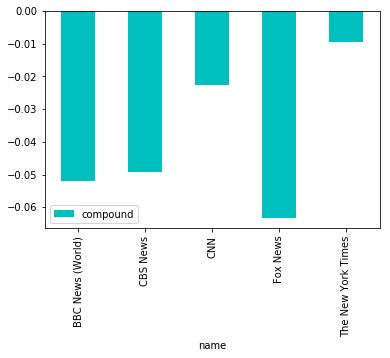

In [42]:
dfbar.plot.bar(color='c');

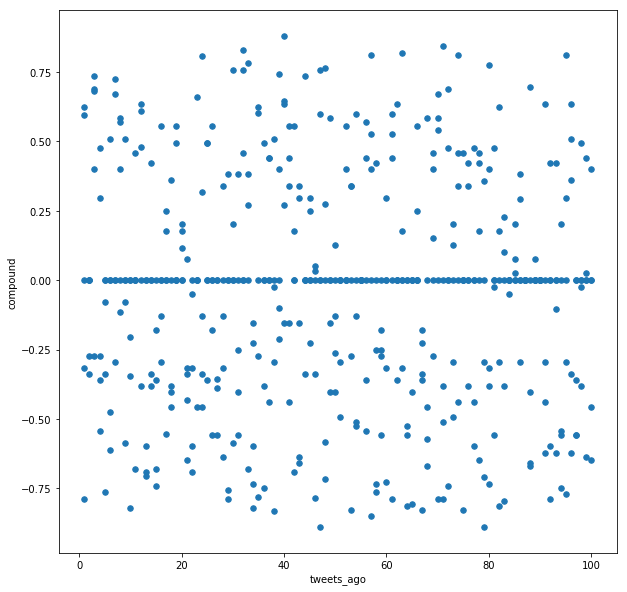

In [53]:
shuffled.plot.scatter(x='tweets_ago', y='compound', figsize=(10,10), s=30);

In [55]:
import seaborn as sns

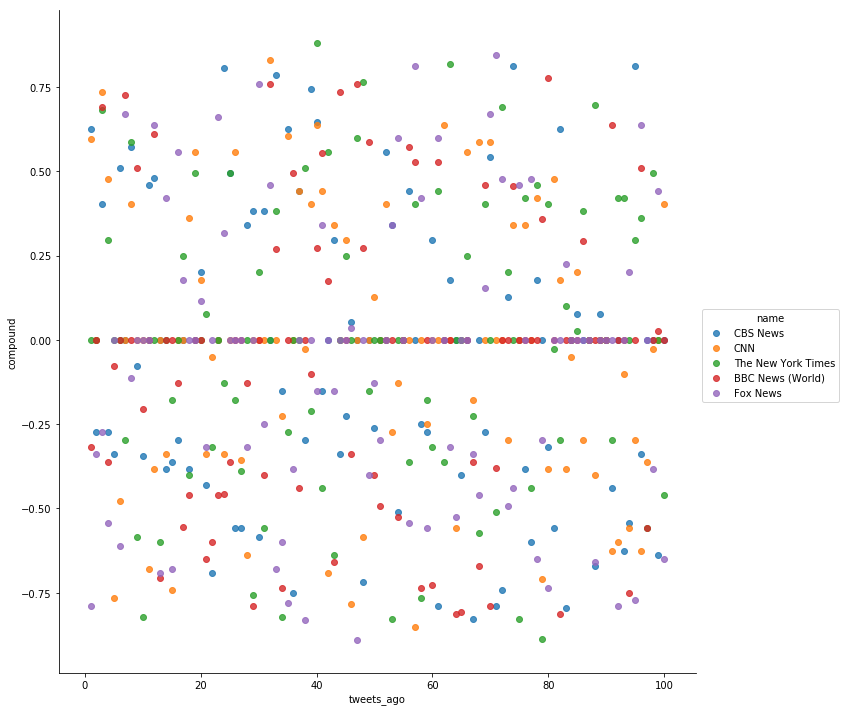

In [80]:
sns.lmplot( x="tweets_ago", y="compound", data=shuffled, fit_reg=False, hue='name', size=10, legend_out=True);